In [14]:
import os
from dotenv import load_dotenv
load_dotenv()
os.environ["IMAGINE_API_KEY"]=os.getenv("IMAGINE_API_KEY")
os.environ["IMAGINE_API_ENDPOINT"]=os.getenv("IMAGINE_ENDPOINT_URL")


In [15]:
from imagine.langchain import ImagineChat
llm = ImagineChat(model="Llama-3-8B")
llm

ImagineChat(client=<imagine.client.ImagineClient object at 0x000002780FBFB8B0>, async_client=<imagine.async_client.ImagineAsyncClient object at 0x000002780FBFA710>, model='Llama-3-8B')

In [16]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages


In [17]:
class State(TypedDict):
   messages:Annotated[list,add_messages]
   
graph_builder = StateGraph(State)

In [18]:
def chatbot(state:State):
    return{"messages":llm.invoke(state['messages'])}

In [19]:
graph_builder.add_node("chatbot",chatbot)

In [20]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)
graph=graph_builder.compile()

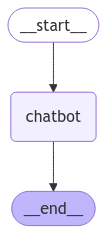

In [21]:
from IPython.display import Image,display
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [22]:
while True:
    user_input=input("User: ")
    if user_input.lower() in ["quit","q"]:
        print("bye")
        break
    for event in graph.stream({'messages':("user",user_input)}):
        print(event.values())
        for value in event.values():
            print(value['messages'])
            print("Assistant: ",value["messages"].content)

ImagineAPITooManyRequestsException: Status: 429. Message: {"message":"Too many requests. Invalid model/rate limits not configured for this model.","status":"error"}